# HW04 Jacobian

In [1]:
import transforms as tr
import transforms_symbolic as st
import kinematics as kin
import kinematics_symbolic as kins
import time

import numpy as np
import sympy as sm
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex

from visualization import VizScene 

np.set_printoptions(precision=4, suppress=True)

## 1. Complete your own function in “kinematics.py” to calculate the Geometric Jacobian.

# (c) 

Discuss what the zeros in the columns of the two different Jacobians mean. This may be much easier if you look at the visualization of the robot described by the DH parameters given. An example of how to do this is shown in the ```hw05_test_jacobian.py``` file.

```
from first set of q's, J is:
[[ 0.  -0.   0.   0. ]
 [ 0.5  0.   0.1 -1. ]
 [ 0.   0.3  0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.  -1.   0.   0. ]
 [ 1.   0.   1.   0. ]]
from second set of q's, J is:
[[-0.3121 -0.1707 -0.1     0.8536]
 [ 0.3121 -0.1707  0.1    -0.1464]
 [ 0.      0.2414  0.      0.5   ]
 [ 0.      0.7071 -0.5     0.    ]
 [ 0.     -0.7071 -0.5     0.    ]
 [ 1.      0.      0.7071  0.    ]]
```

The zeros in the top three rows in the jacobian means there is no effect by the joint rotation on the joint velocity/angular velocity in that direction. You can see in the last joint, for both the first and second set of q's, the angular velocity is zero, which makes sense because the last joint is prismatic. 

## 2. Do the following relative to the robot shown below:

### (a)
Calculate the Jacobian at the tip of the second link for the robot pictured below by hand (this would be the first two joints from HW 03, problem 2(e) where you should have calculated the DH parameters and forward kinematics already). Find this geometric Jacobian symbolically first (in terms of DH parameters).

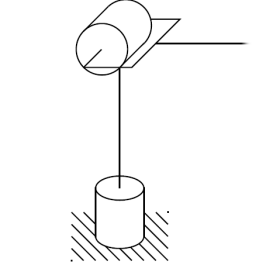

In [2]:
# code
# write out symboilc jacobian function to do it
# define dh parameters
d1, a2, q1, q2 = sm.symbols(r'd_1 a_2 q_1 q_2')

dh2 = [[0, d1, 0, sm.pi/2],
       [0, 0, a2, 0]]

jt_types = ['r', 'r'] # all rotation joints

print('DH parameters:')
display(Math(r' \quad \theta \quad d \quad a \quad \alpha'))
display(Math(vlatex(dh2[0])))
display(Math(vlatex(dh2[1])))

DH parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
arm = kins.SerialArm(dh2, jt=jt_types)

q_set1 = [q1, q2]

print('q set:')
display(Math(r'q_{set} = ' + vlatex(q_set1)))

J1 = arm.jacob(q_set1)

print("Jacobian in terms of dh parameters:")
display(Math(r'J_1 = ' + vlatex(J1)))

q set:


<IPython.core.display.Math object>

Jacobian in terms of dh parameters:


<IPython.core.display.Math object>

### (b)

Now let each link length be 30 cm and use your kinematics.py code to generate a serial arm that represents this arm. Compare the resulting Jacobian at a few different joint configurations using your own Jacobian code. How are the columns affected by the change in position and what does this mean physically (use at least one concrete example to discuss)? Also discuss what happens to the Jacobian when the second joint is moved to 90 degrees (so that the link is straight up or down).

In [4]:
# define numeric arm
d1, a2 = 0.3, 0.3 # meters

dh2_num = [[0, d1, 0, np.pi/2.0],
           [0, 0, a2, 0]]

print('dh params (numeric):')
print(dh2_num)
print('\n')

jt_types = ['r', 'r'] # all rotation joints
arm_num = kin.SerialArm(dh2_num, jt=jt_types)

q_set1_num = [0, 0]

J1_num = arm_num.jacob(q_set1_num)

print("Jacobian in terms of dh parameters:")
# display(Math(r'J_1 = ' + vlatex(J1_num)))
print(J1_num)

dh params (numeric):
[[0, 0.3, 0, 1.5707963267948966], [0, 0, 0.3, 0]]


Jacobian in terms of dh parameters:
[[ 0.  -0. ]
 [ 0.3  0. ]
 [ 0.   0.3]
 [ 0.   0. ]
 [ 0.  -1. ]
 [ 1.   0. ]]


In [5]:
# define serial arm object and animate it
viz = VizScene()

# adding a SerialArm to the visualization, and telling it to draw the joint frames. 
viz.add_arm(arm_num, draw_frames=True)


q_f = lambda t: [5*np.sin(t/10 + 0.0001), np.cos(t/30)]
# q = q_f(0)
q = [0, 0]

# setting the joint angles to draw
viz.update(qs=[q])


time_to_run = 10
refresh_rate = 60

for i in range(refresh_rate * time_to_run):
    # q = q_f(i)
    viz.update(qs=[q])
    time.sleep(1.0/refresh_rate)

viz.close_viz()

In [6]:
arm_num.jacob(q)

array([[ 0. , -0. ],
       [ 0.3,  0. ],
       [ 0. ,  0.3],
       [ 0. ,  0. ],
       [ 0. , -1. ],
       [ 1. ,  0. ]])

Jacobian 1:

```q_set = [0, 0]```

```
J = array([[ 0.       , -0.       ],
       [ 3.000e-01,  0.       ],
       [ 0.       ,  3.000e-01],
       [ 0.       ,  0.       ],
       [ 0.       , -1.000    ],
       [ 1.000    ,  0.       ]])
```

Movement of j1 causes $\omega$ in z direction and velocity in y direction.

Movement of j2 causes $\omega$ in -y direction and velocity in z direction.

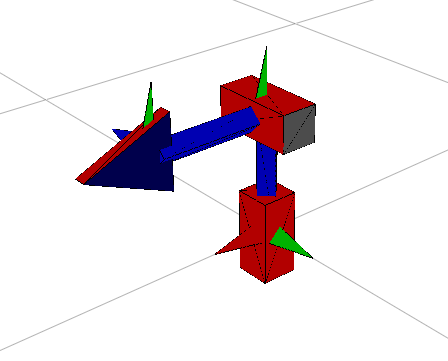

In [7]:
# jacobian when second joint is moved 90 degrees:

q_set1_num = [0, np.pi/2]

J1_num = arm_num.jacob(q_set1_num)

print("Jacobian in terms of dh parameters:")
# display(Math(r'J_1 = ' + vlatex(J1_num)))
np.round(J1_num, decimals=4)
print(J1_num)

Jacobian in terms of dh parameters:
[[-0.  -0.3]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.  -1. ]
 [ 1.   0. ]]


When the second joint is moved to 90 degrees, you can see that the y and z terms in the velocity section of column 2 are zero, meaning that a rotation of joint 2 at that instant won't contribute to the angular velocity in that direction. It will only contribute to the velocity in the x direction, because that is the only non-zero value in the velocity section of column 2 is in the x position. 

Similarly, a rotation of joint 2 will cause an angular velocity of the tip in the y direction, because that is the only non zero value in the angular velocity section of column 2 of the jacobian. 

## 3. 

For the three-link planar manipulator shown below, compute the forward kinematics for the vector $o_c$ (in terms of joint angles and DH parameters) and derive the manipulator Jacobian matrix in symbolic form for point $o_c$. Let the first link length be $a_1$ and the distance from the second joint to point $c$ be $a_c$. 

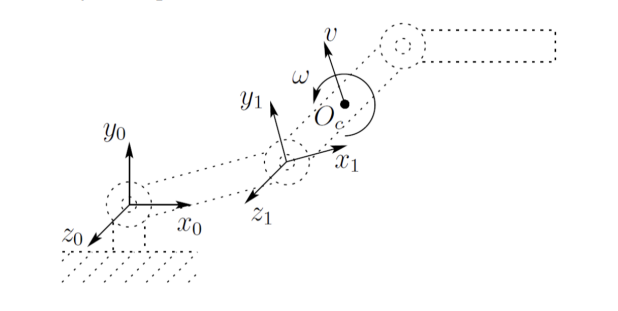

In [8]:
a1, ac = sm.symbols(r'a_1 a_c')

q1, q2 = sm.symbols(r'q_1 q_2')

dh3 = [[0, 0, a1, 0],
       [0, 0, ac, 0]]

arm3 = kins.SerialArm(dh3, jt=jt_types)

q_set3 = [q1, q2]

print('q set 3:')
display(Math(r'q_{set,3} = ' + vlatex(q_set3)))

J3 = arm.jacob(q_set3)

print("Arm 3 Jacobian in terms of dh parameters:")
display(Math(r'J_1 = ' + vlatex(J3)))

q set 3:


<IPython.core.display.Math object>

Arm 3 Jacobian in terms of dh parameters:


<IPython.core.display.Math object>

## 4. 

Using your code from “kinematics.py,” make a SerialArm object to represent the “Stanford” robot arm. The DH parameters for this robot are reported in Tables 2.3 and 2.5 of the book and you can see an image representing this arm below. However, the formulation in the book does not match the image assuming the shown robot is in the “zero” configuration with all its joints (i.e. q = [0,0,0,0,0,0]). Instead, the following DH parameters match the image below assuming that all joint variables “q” are zero.

\begin{equation}
\mathbf{DH} =
\begin{bmatrix}
\text{Link} & \theta_i              & d_i            & a_i & \alpha_i \\
1           & q_1                   & 0              & 0   & -\frac{\pi}{2} \\
2           & q_2                   & 0.154          & 0   & \frac{\pi}{2}  \\
3           & 0                     & q_3 + 0.25     & 0   & 0             \\
4           & q_4 - \frac{\pi}{2}   & 0              & 0   & -\frac{\pi}{2} \\
5           & q_5 - \frac{\pi}{2}   & 0              & 0   & \frac{\pi}{2}  \\
6           & q_6 + \frac{\pi}{2}   & 0.263          & 0   & 0
\end{bmatrix}
\end{equation}


### (a) 

Start by verifying that the DH parameters in the table above match the image below assuming all joint values “q” equal zero.

In [9]:
dh4 = [[0, 0, 0, -np.pi/2.0],
       [0, 0.154, 0, np.pi/2.0],
       [0, 0.25, 0, 0],
       [-np.pi/2.0, 0, 0, -np.pi/2.0],
       [-np.pi/2.0, 0, 0, np.pi/2.0],
       [np.pi/2.0, 0.263, 0, 0]]

jt4 = ['r', 'r', 'p', 'r', 'r', 'r']
q4 = [0, 0, 0, 0, 0, 0]

arm4 = kin.SerialArm(dh4, jt=jt4)
print(arm4)

Serial Arm
DH PARAMS
theta	|	d	|	a	|	alpha	|	type
------------------------------------------------------------------------
0	|	0	|	0	|	-1.5708	|	r
0	|	0.1540	|	0	|	1.5708	|	r
0	|	0.2500	|	0	|	0	|	p
-1.5708	|	0	|	0	|	-1.5708	|	r
-1.5708	|	0	|	0	|	1.5708	|	r
1.5708	|	0.2630	|	0	|	0	|	r



In [10]:
viz = VizScene()

# adding a SerialArm to the visualization, and telling it to draw the joint frames. 
viz.add_arm(arm4, draw_frames=True)

# setting the joint angles to draw
viz.update(qs=[q4])


time_to_run = 10
refresh_rate = 60

for i in range(refresh_rate * time_to_run):
    viz.update()
    time.sleep(1.0/refresh_rate)

viz.close_viz()

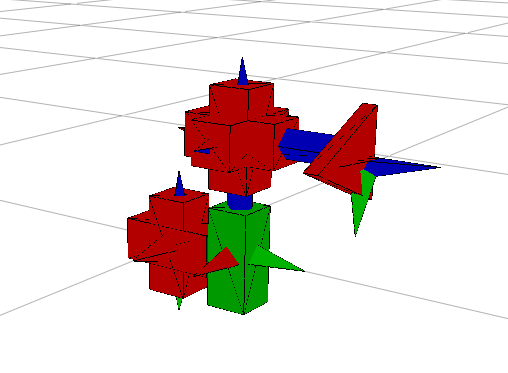

Matches image! Direction of claw will be fixed later. 

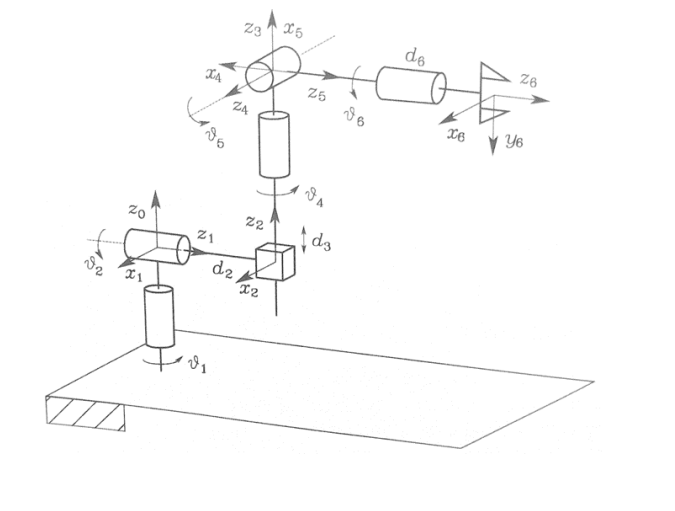

### (b) 

Make a SerialArm object using these defined DH parameters (hint: be careful about defining that one of these joints is a prismatic joint). Also include a transform as follows in the arm declaration:

$$
T_{\text{tip}}^6 = 
\begin{bmatrix}
 &  &  & 0 \\
& \text{Rot}_y\left(-\frac{\pi}{2}\right) & & 0 \\
& & & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$



In [11]:
Ttip = tr.se3(tr.roty(-np.pi/2), [0,0,0])

arm4 = kin.SerialArm(dh4, jt=jt4, tip=Ttip)
print(arm4)

J4 = arm4.jacob(q4)
print(J4)

Serial Arm
DH PARAMS
theta	|	d	|	a	|	alpha	|	type
------------------------------------------------------------------------
0	|	0	|	0	|	-1.5708	|	r
0	|	0.1540	|	0	|	1.5708	|	r
0	|	0.2500	|	0	|	0	|	p
-1.5708	|	0	|	0	|	-1.5708	|	r
-1.5708	|	0	|	0	|	1.5708	|	r
1.5708	|	0.2630	|	0	|	0	|	r

[[-0.417  0.25   0.    -0.263 -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     1.     0.     0.263  0.   ]
 [ 0.     0.     0.     0.     1.     0.   ]
 [ 0.     1.     0.     0.     0.     1.   ]
 [ 1.     0.     0.     1.     0.     0.   ]]


### (c) 

Confirm that the robot arm matches the frames shown below by 1) drawing the serial arm (as shown in “hw05 test jacobian.py”) with coordinate frames (see example from problem 1) or 2) using your “fk” function calling “add frame” for each coordinate frame from 0 to 6 (probably in a for loop). (hint: Remember that for our “fk” function, that in addition to “q,” we can pass an “index” variable. For example, to get $T_1^0$ , we would pass in “1” for the index.)

In [12]:
viz = VizScene()

# adding a SerialArm to the visualization, and telling it to draw the joint frames. 
viz.add_arm(arm4, draw_frames=True)

# setting the joint angles to draw
viz.update(qs=[q4])


time_to_run = 10
refresh_rate = 60

for i in range(refresh_rate * time_to_run):
    viz.update()
    time.sleep(1.0/refresh_rate)

viz.close_viz()

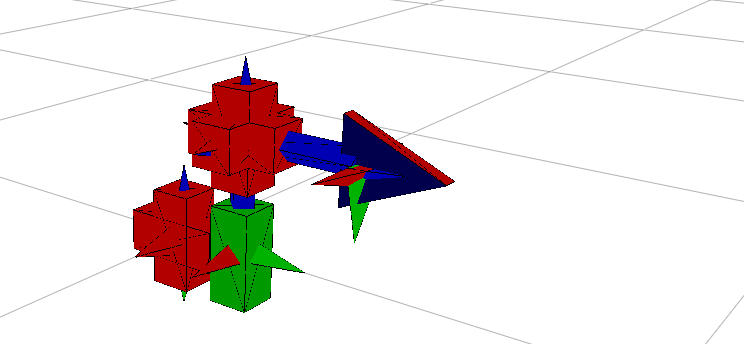

### (d) 

Finally, calculate the Jacobian when all joint angles are zero, and again when only the prismatic joint has moved in the positive direction 0.10 meters. Do the changes in the column values make sense? Please discuss.

In [13]:
q4_ext = [0, 0, 0.1, 0, 0, 0] # prismatic joint extended 0.10 meters

print('Jacobian when all joint angles zero:')
J4 = arm4.jacob(q4)
print(J4)

print('\nJacobian when prismatic joint is extended:')
J4_ext = arm4.jacob(q4_ext)
print(J4_ext)

print('\nAre all entries of both jacobians the same?')
print(J4 == J4_ext)

Jacobian when all joint angles zero:
[[-0.417  0.25   0.    -0.263 -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     1.     0.     0.263  0.   ]
 [ 0.     0.     0.     0.     1.     0.   ]
 [ 0.     1.     0.     0.     0.     1.   ]
 [ 1.     0.     0.     1.     0.     0.   ]]

Jacobian when prismatic joint is extended:
[[-0.417  0.35   0.    -0.263 -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     1.     0.     0.263  0.   ]
 [ 0.     0.     0.     0.     1.     0.   ]
 [ 0.     1.     0.     0.     0.     1.   ]
 [ 1.     0.     0.     1.     0.     0.   ]]

Are all entries of both jacobians the same?
[[ True False  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


As you can see above, all of the entries of both jacobians are the same, except for the linear velocity in the x direction on a rotation by joint 2. This means that when the prismatic joint is extended, there is no effect on the linear or angular velocities of any joint in the arm, except for that one. 

In short, when the prismatic joint is extended, the only effect on the kinematics of the end effector is when you rotate the second joint, and the effect is on the velocity of the end effector in the x direction. 